滤波器
- 低通滤波器：通过低频并阻止高频
- 高通滤波器：阻挡低频并通过高频
- 带通滤波器：仅通过相对窄的频率范围
- 带阻滤波器：仅阻挡相对窄的频率范围

## 低通滤波器（信号能够通过电感的滤波器、或者通过电容连接到地的滤波器对于低频信号的衰减要比高频信号小）
- 原理：利用电容通高频阻低频、电感通低频阻高频的原理。对于需要截止的高频，利用电容吸收、电感阻碍的方法不使它通过；对于需要放行的低频，利用电容高阻、电感低阻的特点让它通过。
- 电感：阻止高频信号通过，允许低频信号通过（电阻-电感(RL)低通拓扑在滤波能力方面与电阻-电容(RC)低通拓扑相当。但实际上电阻-电容方案更为常见）
- 电容：阻止低频信号通过，允许高频信号通过
- 实现：最简单的低通滤波器由电阻和电容元件构成，该低通滤波器的作用是让低于转折频率$f_0$的低频段信号通过， 而将高于转折频率$f_0$的信号去掉
- 电阻电容(RC)低通滤波器工作原理：当输入信号Vin中频率低于转折频率$f_0$的信号加到电路中时，由于C的容抗很大而无分流作用，所以这一低频信号经R输出。当Vin中频率高于转折频率$f_0$时，因C的容抗已很小，故通过R的高频信号由C分流到地而无输出，达到低通的目的。这一电阻电容(RC)低通滤波器的转折频率$f_0$由下式决定
$$
f_0 = \frac{1}{2\pi RC}
$$

<img src="photos/lowpass.png" width="20%">
<img src="photos/bandwidth.png" width="20%">

## 截止频率
- 通带：滤波器不会引起显着衰减的频率范围
- 阻带：滤波器确实导致显着衰减的频率范围
- RC低通滤波器的截止频率：输入信号幅度降低3dB的频率(选择该值是因为幅度降低3dB对应于功率降低50%)，也称为-3dB频率。当保持输入信号的幅度不变，改变频率使输出信号降至最大值的0.707倍，即用频响特性来表述即为-3dB点处即为截止频率，它是用来说明频率特性指标的一个特殊频率。
- 设计实例：电容值比电阻值更具限制性，因此我们将从常见的电容值(例如C=10nF=10*1e-9F)，然后我们将使用该公式来确定所需的电阻值。目标是设计一个滤波器，它将保留5 kHz音频波形并抑制500kHz噪声波形。我们将尝试100kHz的截止频率
$$
100 * 10^3 = \frac{1}{2 \pi R * 10 * 10^{-9}}, \quad R = 159.15 \Omega
$$

## 计算滤波器响应
-  电容器的电抗（电容及电感也会对电流起阻碍作用，称作电抗(Reactance)，其计量单位也叫做欧姆）表示与电流的相反量，但与电阻不同，相反量取决于通过电容器的信号频率因此，我们必须计算特定频率的电抗
$$
X_C = \frac{1}{2 \pi f C}
$$
- RC滤波器使用等效结构，但是我们有一个电容器代替$R_2$，用电容器的电抗($X_C$)代替$R_2$(在分子中)。我们需要计算总阻抗的大小并将其放在分母中
$$
V_{out} = V_{in} \frac{R_2}{R_1+R_2} = V_{in} \frac{X_C}{\sqrt{R_1^2+X_C^2}}
$$
- 以正弦波频率(5kHz)计算该频率的电抗
$$
X_{C\_{5kHz}} = \frac{1}{2\pi * 5000 * 10 * 10^{-9}} = 3183\Omega \\
$$
以及计算$V_{out}$的幅度
$$
V_{out\_{5kHz}} = \frac{3183}{\sqrt{160^2+3183^2}} = 0.999V
$$
- 以噪声频率(500kHz)计算该频率的电抗
$$
X_{C\_{500kHz}} = \frac{1}{2\pi * 500*1000 * 10 * 10^{-9}} = 31.83\Omega \\
$$
以及计算$V_{out}$的幅度
$$
V_{out\_{500kHz}} = \frac{3183}{\sqrt{160^2+31.83^2}} = 0.195V
$$
噪声幅度仅为其原始值的约20%

## 低通滤波器相移（电抗性电路元件总是引入相移）
相位的概念是指周期内特定时刻的周期信号的值。因此，当我们说电路引起相移时，我们的意思是它会在输入信号和输出信号之间产生不对准：输入和输出信号不再在同一时刻开始和结束它们的周期。相移值(例如45°或90°)表示已创建多少未对准。

电路中的每个电抗元件都会引入90°的相移，但这种相移不会同时发生。输出信号的相位与输出信号的幅度一样，随着输入频率的增加而逐渐变化。在RC低通滤波器中，我们有一个电抗元件(电容器)，因此电路最终会引入90°的相移。

与幅度响应一样，通过检查水平轴表示对数频率的曲线图，可以最容易地评估相位响应。下面的描述传达了一般模式，然后您可以通过检查绘图来填写详细信息。相移最初为0°。它逐渐增加，直到它在截止频率达到45°; 在这部分响应期间，变化率正在增加。在截止频率之后，相移继续增加，但变化率正在降低。随着相移渐近接近90°，变化率变得非常小。实线是幅度响应，虚线是相位响应。截止频率为100 kHz。注意，截止频率下的相移为45°。

## 可视化滤波器响应

- 评估滤波器对信号影响的最方便方法是检查滤波器频率响应的图。这些图形通常称为波德图(Bode)在垂直轴上具有幅度(以分贝为单位)，在水平轴上具有频率; 水平轴通常具有对数标度
- 曲线上的每个点表示如果输入信号的幅度为1 V且频率等于水平轴上的相应值，则输出信号将具有的幅度。例如，当输入频率为1 MHz时，输出幅度(假设输入幅度为1 V)将为0.1 V(因为-20 dB对应于十倍减少因子)
- 5 kHz时的幅度响应基本上是0 dB(即几乎为零衰减)，500 kHz时的幅度响应约为-14 dB(对应于0.2的增益)。这些值与我们在上一节中执行的计算结果一致
- 由于RC滤波器总是从通带到阻带逐渐过渡，并且因为衰减永远不会达到无穷大，我们无法设计出“完美”的滤波器 - 即对正弦波没有影响并完全消除噪声的滤波器。相反，我们总是需要权衡。如果我们将截止频率移近5 kHz，我们将有更多的噪声衰减，但我们想要发送到扬声器的正弦波衰减更多。如果我们将截止频率移近500 kHz，我们在正弦波频率下的衰减会减少，但噪声频率下的衰减也会减少

dB无量纲，即频率响应增益的分贝值
- 定义
  - 幅值之比：$1dB = 20 * \log_{10}(\frac{X}{X_0})$, $X_0$为功率的参考值，通常为1
  - 功率之比
- 作用
  1. 表示幅值的增益或衰减，正值表示增益，负值表示衰减
  2. 用对数dB表达增益或衰减随频率变化的曲线时，可以大大扩大线性增益变化的区间，例如人耳可听见的声压幅值波动范围2e-5～20P，对应0～120dB

5kHz时的幅度响应约为-0.011dB(对应于0.999的增益)
100kHz时的幅度响应约为-3.010dB(对应于0.707的增益)
500kHz时的幅度响应约为-14.150dB(对应于0.196的增益)
500kHz时的幅度响应约为-20.043dB(对应于0.100的增益)


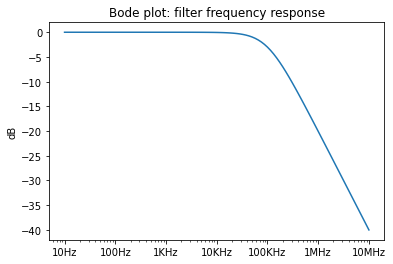

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def compute_R(f_cutoff, C=10*1e-9):
    """ compute the resistance
    Params:
    f_cutoff: given cutoff frequency
    C: known capacitance
    Returns:
    R: resistance
    """
    R = 1 / (2 * np.pi * C * f_cutoff)
    return R

def compute_Xc(f, C=10*1e-9):
    """ compute the reactance of capacitance
    Params:
    f: signal frequency
    C: known capacitance
    """
    Xc = 1 / (2 * np.pi * f * C)
    return Xc

def compute_Vout(Xc, R, Vin=1):
    """ compute the amplitude of output signal
    Params:
    Xc: reactance of capacitance
    R: resistance
    Vin: amplitude of input signal, = 1 by default
    """
    Vout = Vin * Xc / np.sqrt(R**2 + Xc**2)
    return Vout

def get_Vout(f, f_cutoff, C=10*1e-9, Vin=1):
    R = compute_R(f_cutoff=f_cutoff, C=C)
    Xc = compute_Xc(f=f, C=C)
    Vout = compute_Vout(Xc=Xc, R=R, Vin=Vin)
    return Vout

def compute_delta(Vout, delta0=1):
    """ compute the attenuation of given frequency
    Params:
    Vout: amplitude of output signal
    delta0: 
    """
    return 20 * np.log10(Vout / delta0)
    
def get_delta(f, f_cutoff, C=10*1e-9, Vin=1, delta0=1):
    """ compute the gain or attenuation of the amplitude as frequency changes
    Params:
    f: given frequency
    delta0: reference value for power, = 1 by default
    Returns:
    delta: frequency response
    """
    R = compute_R(f_cutoff=f_cutoff, C=C)
    Xc = compute_Xc(f=f, C=C)
    Vout = compute_Vout(Xc=Xc, R=R, Vin=Vin)
    delta = compute_delta(Vout=Vout, delta0=delta0)
    return delta


f_cutoff = 100 * 1000

f = 5 * 1000
V_5 = get_Vout(f=f, f_cutoff=f_cutoff)
delta_5 = get_delta(f=f, f_cutoff=f_cutoff)
print (f'5kHz时的幅度响应约为{delta_5:1.3f}dB(对应于{V_5:1.3f}的增益)')

f = 100 * 1000
V_100 = get_Vout(f=f, f_cutoff=f_cutoff)
delta_100 = get_delta(f=f, f_cutoff=f_cutoff)
print (f'100kHz时的幅度响应约为{delta_100:1.3f}dB(对应于{V_100:1.3f}的增益)')

f = 500 * 1000
V_500 = get_Vout(f=f, f_cutoff=f_cutoff)
delta_500 = get_delta(f=f, f_cutoff=f_cutoff)
print (f'500kHz时的幅度响应约为{delta_500:1.3f}dB(对应于{V_500:1.3f}的增益)')

f = 1000 * 1000
V_1000 = get_Vout(f=f, f_cutoff=f_cutoff)
delta_1000 = get_delta(f=f, f_cutoff=f_cutoff)
print (f'500kHz时的幅度响应约为{delta_1000:1.3f}dB(对应于{V_1000:1.3f}的增益)')

f = np.logspace(1, 7, 100)
delta = get_delta(f=f, f_cutoff=f_cutoff)
plt.semilogx(f, delta)
a = np.logspace(1, 7, 7)
labels = ['10Hz', '100Hz', '1KHz', '10KHz', '100KHz', '1MHz', '10MHz']
plt.xticks(a, labels)
plt.title('Bode plot: filter frequency response')
plt.ylabel('dB')
plt.show()

## 评估低通滤波器性能
5kHz时的幅度响应基本上是0dB(即几乎为零衰减)，500kHz时的幅度响应约为-14dB(对应于0.2的增益)。这些值与我们在上一节中执行的计算结果一致。

由于RC滤波器总是从通带到阻带逐渐过渡，并且因为衰减永远不会达到无穷大，我们无法设计出“完美”的滤波器 - 即对正弦波没有影响并完全消除噪声的滤波器。相反，我们总是需要权衡。如果我们将截止频率移近5 kHz，我们将有更多的噪声衰减，但我们想要发送到扬声器的正弦波衰减更多。如果我们将截止频率移近500 kHz，我们在正弦波频率下的衰减会减少，但噪声频率下的衰减也会减少。

## 巴特沃斯滤波器

### 低通滤波器（用振幅的平方对频率的公式表示）
$$
|H(w)|^2 = \frac{1}{1 + (\frac{w}{w_c})^{2n}},
$$
$n$为滤波器的阶数，$w$为电路工作频率，$w_c$为截止频率，即振幅下降为−3dB时的频率。

频率响应图

<img src="photos/butter.png" width="50%">

当$n\rightarrow \infty$时，得到一个理想的低通滤波：当$\frac{w}{w_c}<1$时，增益为1；$\frac{w}{w_c}>1$时，增益为0；$\frac{w}{w_c}=1$时，增益为$\frac{1}{\sqrt{2}}=0.707$。

### 高通
### 带通
### 带阻

### python
scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba')

输入参数：
N:滤波器的阶数
Wn：归一化截止频率。计算公式Wn=2*截止频率/采样频率。（注意：根据采样定理，采样频率要大于两倍的信号本身最大的频率，才能还原信号。截止频率一定小于信号本身最大的频率，所以Wn一定在0和1之间）。当构造带通滤波器或者带阻滤波器时，Wn为长度为2的列表。
btype : 滤波器类型{‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’},
output : 输出类型{‘ba’, ‘zpk’, ‘sos’}

输出参数：
b，a: IIR滤波器的分子（b）和分母（a）多项式系数向量。output='ba'
z,p,k: IIR滤波器传递函数的零点、极点和系统增益. output= 'zpk'
sos: IIR滤波器的二阶截面表示。output= 'sos'

### 作用
- 巴特沃斯的低通滤波：可以用于去除工频干扰，也就是去除信号的高频噪声部分，让信号变得平滑
- 巴特沃斯的高通滤波：可以用于去除基线漂移，也就是去除信号的低频噪声部分，让信号变得平稳
- 同时过滤工频干扰（高频噪声）和基线漂移（低频噪声）：带通滤波

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

def lowpass_butter(data, bpOrder, fs, f_cutoff):
	"""
	Params:
	fs: sampling frequency, = 2 * highest frequency of data by Nyquist
	f_cutoff: cutoff frequency, in lowpass case, remove the frequency higher than f_cutoff
	bpOrder: order of butter
	"""
	Wn = 2 * f_cutoff / fs
	b, a = signal.butter(bpOrder, Wn, 'lowpass')
	return signal.filtfilt(b, a, data)

def highpass_butter(data, bpOrder, fs, f_cutoff):
	"""
	Params:
	fs: sampling frequency, = 2 * highest frequency of data by Nyquist
	f_cutoff: cutoff frequency, in highpass case, remove the frequency lower than f_cutoff
	bpOrder: order of butter
	"""
	Wn = 2 * f_cutoff / fs
	b, a = signal.butter(bpOrder, Wn, 'highpass')
	return signal.filtfilt(b, a, data)

def bandpass_butter(data, bpOrder, fs, f_cutoff):
	"""
	Params:
	fs: sampling frequency, = 2 * highest frequency of data by Nyquist
	f_cutoff: cutoff frequency, in bandpass case, a length-2 sequence, i.e., 
	[lowest freq that can pass highpass filter, highest freq that can pass lowpass filter]
	bpOrder: order of butter
	"""
	Wn = list([2 * f_cutoff[0] / fs, 2 * f_cutoff[1] / fs])
	b, a = signal.butter(bpOrder, Wn, 'bandpass')
	return signal.filtfilt(b, a, data)


<StemContainer object of 3 artists>

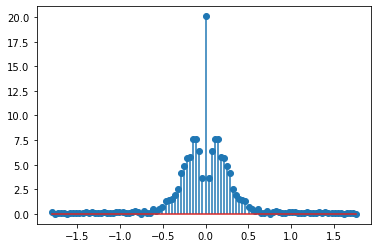

In [14]:
import wfdb

record_100 = wfdb.rdrecord('mit-bih-arrhythmia-database-1.0.0/100', sampfrom=0, sampto=25000, physical=True, channels=[0, ])
original_ecg = record_100.p_signal[0:100].flatten()

fft_data = np.fft.fft(original_ecg)
shift_fft_data = np.fft.fftshift(fft_data)
freq = np.fft.fftfreq(len(original_ecg)) / len(original_ecg) * 360
shift_freq = np.fft.fftshift(freq)

plt.stem(shift_freq, np.abs(shift_fft_data))


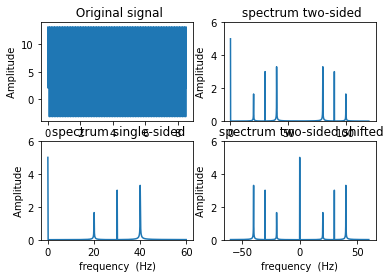

In [15]:
N = 1024                        # 采样点数
sample_freq=120                 # 采样频率 120 Hz, 大于两倍的最高频率
sample_interval=1/sample_freq   # 采样间隔
signal_len=N*sample_interval    # 信号长度
t=np.arange(0,signal_len,sample_interval)

# t = (0:1 / sample_freq:(N-1) / sample_freq)
signal = 5 + 2 * np.sin(2 * np.pi * 20 * t) + 3 * np.sin(2 * np.pi * 30 * t) + 4 * np.sin(2 * np.pi * 40 * t)  # 采集的信号

# fft_data = np.fft.fft(signal)
fft_data = np.fft.fft(signal)
# 这里幅值要进行一定的处理，才能得到与真实的信号幅值相对应
fft_amp0 = np.array(np.abs(fft_data)/N*2)   # 用于计算双边谱
direct=fft_amp0[0]
fft_amp0[0]=0.5*direct
N_2 = int(N/2)

fft_amp1 = fft_amp0[0:N_2]  # 单边谱
fft_amp0_shift = np.fft.fftshift(fft_amp0)    # 使用fftshift将信号的零频移动到中间

# 计算频谱的频率轴
list0 = np.array(range(0, N))
list1 = np.array(range(0, int(N/2)))
list0_shift = np.array(range(0, N))
freq0 = sample_freq*list0/N        # 双边谱的频率轴
freq1 = sample_freq*list1/N        # 单边谱的频率轴
freq0_shift=sample_freq*list0_shift/N-sample_freq/2  # 零频移动后的频率轴

# 绘制结果
plt.figure()
# 原信号
plt.subplot(221)
plt.plot(t, signal)
plt.title(' Original signal')
plt.xlabel('t (s)')
plt.ylabel(' Amplitude ')
# 双边谱
plt.subplot(222)
plt.plot(freq0, fft_amp0)
plt.title(' spectrum two-sided')
plt.ylim(0, 6)
plt.xlabel('frequency  (Hz)')
plt.ylabel(' Amplitude ')
# 单边谱
plt.subplot(223)
plt.plot(freq1, fft_amp1)
plt.title(' spectrum single-sided')
plt.ylim(0, 6)
plt.xlabel('frequency  (Hz)')
plt.ylabel(' Amplitude ')
# 移动零频后的双边谱
plt.subplot(224)
plt.plot(freq0_shift, fft_amp0_shift)
plt.title(' spectrum two-sided shifted')
plt.xlabel('frequency  (Hz)')
plt.ylabel(' Amplitude ')
plt.ylim(0, 6)

plt.show()

In [16]:
print (list0)
print (list0 / N)
print (freq0)

print (np.fft.fftfreq(N))

[   0    1    2 ... 1021 1022 1023]
[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 9.97070312e-01
 9.98046875e-01 9.99023438e-01]
[0.00000000e+00 1.17187500e-01 2.34375000e-01 ... 1.19648438e+02
 1.19765625e+02 1.19882812e+02]
[ 0.          0.00097656  0.00195312 ... -0.00292969 -0.00195312
 -0.00097656]


In [17]:

# plt.figure(figsize=(10, 6))
# plt.subplot(211)
# plt.plot(original_ecg)
# plt.plot(filtered_ecg)
# plt.legend(['original ecg', 'filtered ecg'])
# plt.title('butter band')
# plt.tight_layout()
# plt.show()

# fs = 256
# bpOrder = 3
# data = pywt.data.ecg()
# lowpass_filter = lowpass_butter(data, bpOrder, fs, f_cutoff=20)
# highpass_filter = highpass_butter(data, bpOrder, fs, f_cutoff=1)
# bandpass_filter = bandpass_butter(data, bpOrder, fs, f_cutoff=[1, 20])

# plt.subplot(3, 1, 1)
# plt.plot(data)
# plt.plot(lowpass_filter)
# plt.title('low pass filter')
# plt.legend(['original', 'lowpass'])
# plt.subplot(3, 1, 2)
# plt.plot(data)
# plt.plot(highpass_filter)
# plt.title('high pass filter')
# plt.legend(['original', 'highpass'])
# plt.subplot(3, 1, 3)
# plt.plot(data)
# plt.plot(bandpass_filter)
# plt.title('band pass filter')
# plt.legend(['original', 'bandpass'])

# plt.tight_layout()
# plt.show()